In [118]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,f1_score,accuracy_score,precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import display

# import Modellen

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")



In [108]:
median_klassifikation_team = pd.read_csv("median_klassifikation_team_v2.csv")
median_klassifikation_team.head()

,year,team_placement_2,height,weight,age,spieleranzahl,spieler_median,auslaender_prozent
0,2003,0,1.818743,76.018072,40.976190,168,33.600000,63.095238
1,2003,2,1.812329,76.712329,42.301370,73,24.333333,54.810496
2,2004,2,1.820952,76.904762,41.602410,84,28.000000,47.945205
3,2005,0,1.827250,76.925000,39.031250,160,32.000000,65.662651
4,2005,2,1.824366,77.070423,39.295775,71,23.666667,56.176471


In [121]:
median_klassifikation_team['team_placement_2'].value_counts()

2    15
0    10
1     4
Name: team_placement_2, dtype: int64

**Shuffle und Split Data**

Mischen und Teilen von Daten

- Ich werde nun die Daten (sowohl Features als auch ihre Bezeichnungen) in Trainings- und Testdatensätze aufteilen. 70 % der Daten werden für Training und 30 % für Tests verwendet.

In [109]:
X = median_klassifikation_team.drop(columns=['year','team_placement_2','spieleranzahl'])
y = median_klassifikation_team.team_placement_2

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

**Normalisierung der Daten**

Viele maschinelle Lernalgorithmen funktionieren besser, wenn numerische Eingabevariablen auf einen Standardbereich skaliert werden.  **Die Normalisierung** skaliert jede Eingabevariable separat auf den Bereich 0-1. Das ist der Bereich für Fließkommawerte, in dem wir die größte Genauigkeit haben.

Die Skalenunterschied für Eingabevariablen wirkt sich nicht auf alle Algorithmen für maschinelles Lernen aus.
Betroffen sind beispielsweise Algorithmen, die zu einem Modell passen, das eine gewichtete Summe von Eingabevariablen verwendet, wie lineare Regression, logistische Regression und künstliche neuronale Netze.

Ich werde die Standardkonfiguration verwenden und Werte auf den Bereich 0 und 1 skalieren. Zuerst wird eine MinMaxScaler- Instanz mit Standard-Hyperparametern definiert. Nach der Definition kann ich die Funktion fit_transform() aufrufen und an unseren Datensatz übergeben, um eine transformierte Version unseres Datensatzes zu erstellen.

In [110]:
scaler = MinMaxScaler()
X_treino_scaler = scaler.fit_transform(X_train)
X_teste_scaler = scaler.transform(X_valid)
X_teste_scaler

array([[ 0.86218388,  0.3506738 , -0.01679187,  0.425     ,  0.84947518],
       [ 0.43683838,  0.25076658,  0.44387251,  0.75      ,  0.63304309],
       [ 0.4176899 ,  0.35812842,  0.49784713,  0.62857143,  1.02902335],
       [ 1.29434972,  1.02837531,  0.27246464,  0.30357143,  0.64938549],
       [ 0.96122339,  0.2885317 ,  0.63492912,  0.375     , -0.07313263],
       [ 0.47820059,  0.43839182,  0.51809296,  0.74642857,  0.80986897],
       [ 0.66213831,  0.29163429,  0.17453573,  0.26428571,  0.82333688],
       [ 0.37681693,  0.3947478 ,  0.9196206 ,  0.53214286,  0.87476868],
       [ 0.67787888,  0.23393213, -0.01691787,  0.47321429,  0.60715022]])

### Überwachten der Modellen

**1.Logistische Regression**

Logistische Regression schätzt die Wahrscheinlichkeit des Auftretens eines Ereignisses, wie z. B. gewählt oder nicht gewählt, basierend auf einem bestimmten Datenbestand unabhängiger Variablen. Da das Ergebnis eine Wahrscheinlichkeit ist, ist die abhängige Variable auf einen Wert zwischen 0 und 1 beschränkt. Bei der logistischen Regression wird eine Logit-Transformation auf die Odds angewendet – also die Wahrscheinlichkeit des Erfolgs dividiert durch die Wahrscheinlichkeit des Fehlschlagens. Dies wird allgemein auch als Log-Odds oder natürlicher Logarithmus der Odds bezeichnet, und diese logistische Funktion wird durch die folgenden Formeln dargestellt:

 **Logit(pi) = 1/(1+ exp(-pi))**

 **ln(pi/(1-pi)) = Beta_0 + Beta_1*X_1 + … + B_k*K_k**


Vorteile:

- Logistische Regression wird häufig verwendet, da sie äußerst effizient ist und keine großen Mengen an Rechenressourcen benötigt. Sie kann einfach interpretiert werden und benötigt keine Skalierung von Eingabe-Funktionen.


Nachteile:

- Logistische Regression kann auch für Überanpassung anfällig sein, insbesondere wenn es eine große Anzahl an Prädiktorvariablen im Modell gibt. Regularisierung wird normalerweise verwendet, um die Parameter großer Koeffizienten zu penalisieren, wenn das Modell unter hoher Dimensionalität leidet.

**2.Entscheidungsbäume**

Ein Entscheidungsbaum ist ein nichtparametrischer überwachter Lernalgorithmus, der sowohl für Klassifizierungs- als auch für Regressionsaufgaben verwendet wird. Er verfügt über eine hierarchische, baumartige Struktur, die aus einem Wurzelknoten, Zweigen, internen Knoten und Blattknoten besteht.


Vorteile :

- Entscheidungsbäume kann mit kategorialen und numerischen Daten umgehen.
- Sie erfordern nicht viel Datenvorverarbeitung und kann Daten verarbeiten, die nicht normalisiert oder für maschinelles Lernen codiert wurden.
- Einfach zu verstehen und zu interpretieren.

Nachteile:

- Komplexe Entscheidungsbäume lassen sich nicht gut auf die Daten verallgemeinern und können zu einer Überanpassung führen.
- Instabil, da kleine Abweichungen in den Daten zu einem anderen Entscheidungsbaum führen können. Daher werden sie normalerweise in einem Ensemble (wie Random Forests) verwendet, um Robustheit aufzubauen.

**3.Support Vector Machines (SVM)**

Die SVM wird gern für Klassifizierungsprobleme herangezogen, also um Datenpunkte in Klassen oder Gruppen einzuteilen. Hierzu wird für n-dimensionale  Punktemengen unterschiedlicher Kategorien eine Trennebene errechnet, die den maximalen Abstand zu den nächsten Punkten der zu trennender Kategorie aufweist. 

SVMs wurden Aufgrund ihrer Wirksamkeit bei hoher Dimensionalität ausgewählt. Außerdem ist unser Datensatz nicht so groß.

Vorteile:
- Effektiv in hochdimensionalen Räumen oder wenn viele Features vorhanden sind. Kernelfunktionen können zur Anpassung an unterschiedlichen Fällen verwendet und bei Bedarf vollständig angepasst werden. Somit sind SVMs vielseitig einsetzbar.

Nachteile:
- Funktioniert nicht gut mit großen Datensätzen. Liefert keine direkten Wahrscheinlichkeitsschätzungen.




**4.Ensemble methods: AdaBoost**

AdaBoost (adaptives Boosting) ist ein Algorithmus für das Ensemble-Lernen, der für die Klassifikation oder Regression verwendet werden kann. 

Bei jedem Trainingsdurchlauf wird ein neuer schwacher Lerner zum Ensemble hinzugefügt und ein Gewichtsvektor wird eingestellt, der sich auf Beispiele konzentriert, die im vorherigen Durchlauf falsch klassifiziert wurden. Das Ergebnis ist ein Klassifizierer, der über eine höhere Genauigkeit verfügt, als die Klassifizierer des schwachen Lerners.
https://de.mathworks.com/discovery/adaboost.html.


Ensemble-Methoden gelten als qualitativ hochwertige Klassifikatoren und adaboost ist einer der beliebtesten Boosting-Algorithmen.Es gibt auch eine Klassenungleichgewicht in dem Datensatz gegen das Boosting robust sein könnte.

Vorteile:

- Ensemble-Methoden und einschließlich Adaboost sind robuster als einzelne Schätzer und haben eine verbesserte Generalisierbarkeit. Einfache Modelle können kombiniert werden, um ein komplexes Modell zu erstellen, das rechenschnell ist.

- Adaboos verwendet standardmäßig einen Entscheidungsstumpf, d.h. einen Entscheidungsbaum der Tiefe 1, als Basisklassifikator, der kategoriale und numerische Daten verarbeiten kann. Schwache Lerner sind relativ schneller zu trainieren, sodass die Datensatzgröße kein Problem für den Algorithmus darstellt.

Nachteile::
- Wenn wir einen voreingenommenen zugrunde liegenden Klassifikator haben, führt dies zu einem voreingenommenen verstärkten Modell.
 

### Metriken: 

**accuracy**

Mit der accuracy können wir den Anteil der Korrekt vorhergesagten Labels anzeigen

Die Klassifizierungsgenauigkeit beinhaltet zunächst die Verwendung eines Klassifizierungsmodells, um eine Vorhersage für jedes Beispiel in einem Testdatensatz zu treffen. Die Vorhersagen werden dann mit den bekannten Bezeichnungen für diese Beispiele im Testsatz verglichen. Die Genauigkeit wird dann als der Anteil der Beispiele in der Testreihe berechnet, die richtig vorhergesagt wurden, dividiert durch alle Vorhersagen, die in der Testreihe gemacht wurden.

**Genauigkeit = Korrekte Vorhersagen / Gesamte Vorhersagen**

Wenn die Klassenverteilung unausgewogenen sind, kann die Genauigkeit zu einem unzuverlässigen Maß für die Modellleistung werden.

**F-beta-score**

Das F-Maß gleicht die Präzision und den Recall aus.

Bei einigen Problemen könnten wir an einem F-Maß interessiert sein, bei dem mehr Wert auf Präzision gelegt wird, z.B. wenn es wichtiger ist, falsch positive Ergebnisse zu minimieren, falsch negative jedoch immer noch wichtig sind.

Bei anderen Problemen könnten wir an einem F-Maß interessiert sein, bei dem der recall mehr Aufmerksamkeit geschenkt wird, z. B. wenn es wichtiger ist, falsch negative Ergebnisse zu minimieren, aber falsch positive Ergebnisse immer noch wichtig sind.

Die Lösung ist das Fbeta-Maß.

Das Fbeta-Measure ist eine Abstraktion des F-Maßes, bei der das Gleichgewicht zwischen Präzision und Recall bei der Berechnung des harmonischen Mittelwerts durch einen Koeffizienten namens Beta gesteuert wird .

**Fbeta = ((1 + beta^2) * Präzision * recall) / (beta^2 * Präzision + recall)**


Drei gängige Werte für den Beta-Parameter sind wie folgt:

* F.-Measure (beta=0.5): Mehr Gewicht auf Präzision, weniger Gewicht auf recall
* F-Measure (beta=1.0): Ausbalancierung des Gewichts auf Precision und Recall*
* F-Measure (beta=2.0): Weniger Gewicht auf Präzision, mehr Gewicht auf recall

### Erstellen einer Trainings- und Vorhersagepipeline

Um die Leistung jedes von uns ausgewählten Modells richtig zu bewerten, ist es wichtig, eine Trainings- und Vorhersagepipeline zu erstellen, so kann ich Modelle schnell und effektiv mit unterschiedlichen Größen von Trainingsdaten zu trainieren und Vorhersagen für die Testdaten durchzuführen.

In [111]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,f1_score,accuracy_score

def train_predict(learner, X_train, y_train, X_valid, y_valid): 
    '''
    inputs:
       - Learner: der zu trainierende und vorherzusagende Lernalgorithmus
       - X_train: features training set
       - y_train: Zielvariable training set
       - X_test: features testing set
       - y_test: Zielvariable testing set
    '''
    
    results = {}
    
    # Fit der learner mit den  training data 
    start = time() #  start time
    learner = learner.fit(X_train,y_train)
    end = time() # end time
    
    # berechnung training time
    results['train_time'] = end - start
        
    # ZU predictions on the test set,
    # then get predictions on samples
    start = time() # Get start time
    predictions = learner.predict(X_valid)
    end = time() # Get end time
    
    # berechnungthe total prediction time
    results['pred_time'] = end - start
            
    # accuracy
    results['acc_score'] = accuracy_score(y_valid,predictions)
    
    #results['f1'] = f1_score(y_valid,predictions)
    results['F_marcro'] = fbeta_score(y_valid,predictions,beta=0.5,average='macro')
    
        
    # Return the results
    return results

In [112]:
# Importieren vier die drei überwachten Lernmodelle aus sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import fbeta_score, accuracy_score
# Initialisieren Sie die drei Modelle, die Zufallszustände werden auf 101 gesetzt, 
#damit wir wissen, wie wir das Modell später reproduzieren können
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state = 101)
clf_C = AdaBoostClassifier(random_state = 101)
clf_D = LogisticRegression(random_state = 101)

samples = len(X_train)


results = {}
for clf in [clf_A, clf_B, clf_C,clf_D]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i in [samples]:
        results[clf_name][i]= \
        train_predict(clf, X_train, y_train, X_valid, y_valid)
        

### Modellbewertung:
Alle vier naive Algorithmen werden traniert und die Algorithmus-Metriken accuracy und F-marcro werden dann verglichen. Der beste Algothimus war AdaBoostClassifier mit einer accuracy von 0.777778 und 0.534852 F_marcro	

In [113]:
for a, i in results.items():
    print(a)
    display(pd.DataFrame(list(i.values())).T.rename(columns = {0:'ergebnisse'}))

DecisionTreeClassifier


,ergebnisse
train_time,0.001982
pred_time,0.000000
acc_score,0.666667
F_marcro,0.492899


SVC


,ergebnisse
train_time,0.002012
pred_time,0.001977
acc_score,0.333333
F_marcro,0.128205


AdaBoostClassifier


,ergebnisse
train_time,0.042941
pred_time,0.005999
acc_score,0.777778
F_marcro,0.534852


LogisticRegression


,ergebnisse
train_time,0.012002
pred_time,0.000000
acc_score,0.777778
F_marcro,0.534852


###  Modellen werden mit normarlizietem Dataset trainiert. 

Für die vier Modellen werden mit den Traningsdaten X_treino_scaler X_teste_scaler übergeben.

AdaBoostClassifier war der beste Algorithmus mit den Metriken acc_score	0.777778 und F_marcro 0.534852

In [64]:
# results = {}
# for clf in [clf_A, clf_B, clf_C,clf_D]:
#     clf_name = clf.__class__.__name__
#     results[clf_name] = {}
#     for i in [samples]:
#         results[clf_name][i]= \
#         train_predict(clf, X_treino_scaler, y_train, X_teste_scaler, y_valid)
       

In [65]:
# for a, i in results.items():
#     print(a)
#     display(pd.DataFrame(list(i.values())).T.rename(columns = {0:'ergebnis'}))

DecisionTreeClassifier


,ergebnis
train_time,0.002024
pred_time,0.000000
acc_score,0.666667
F_marcro,0.492899


SVC


,ergebnis
train_time,0.000000
pred_time,0.000991
acc_score,0.555556
F_marcro,0.417701


AdaBoostClassifier


,ergebnis
train_time,0.041950
pred_time,0.005002
acc_score,0.777778
F_marcro,0.534852


LogisticRegression


,ergebnis
train_time,0.002001
pred_time,0.000000
acc_score,0.444444
F_marcro,0.328042


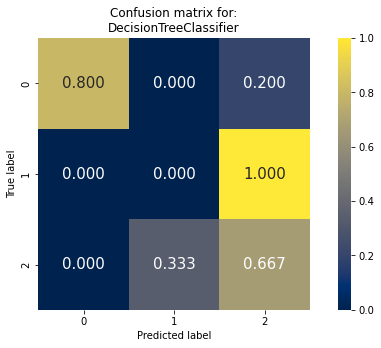

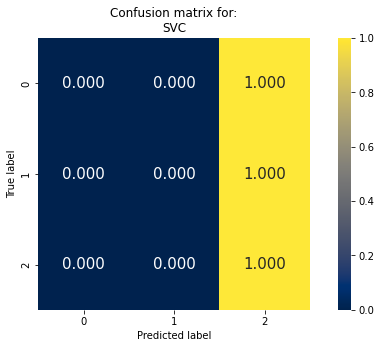

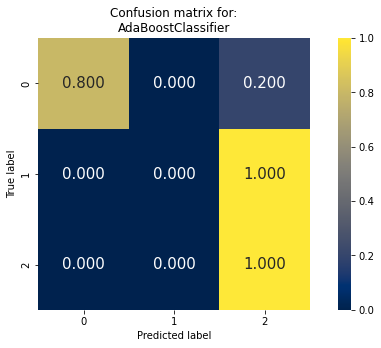

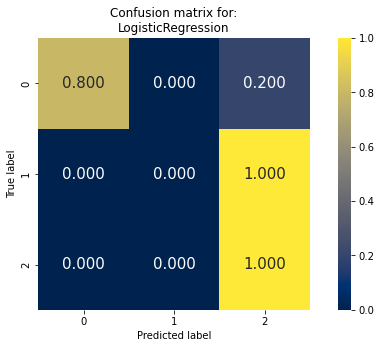

In [114]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C,clf_D]):
    cm = confusion_matrix(y_valid, model.predict(X_valid))
    cm = cm.astype('float') / cm.sum(axis=1).T[:, np.newaxis] # normalize the data
    #cm = cm.astype('float') / cm.sum(axis=1)
    

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":15}, 
    cmap='cividis', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

## Modelle Ergebnis:

Betrachtet man die obigen Ergebnisse, ist **AdaBoost** und **logistische Regresion** von den vier Modellen für unsere Aufgabe am besten geeigneten.

In erster Linie sind die beiden Modellen, die bei den Testdaten sowohl in Bezug auf die Genauigkeit als auch auf den f-Wert am besten abschneiden. Es dauert auch relativ wenig Zeit, um mit dem vollständigen Datensatz zu trainieren, was nur ein Bruchteil der 0.042893 und 0.003004 Sekunden ist.



### Tuning  des Modells:

#### Adaboost:

Mithilfe der Rastersuche (GridSearchCV) mit verschiedenen Parameter/Wert-Kombinationen kann ic das Modell für noch bessere Ergebnisse optimieren.
Für Adaboost werde ich den Parameter n_estimators und die Lernrate, sowie den Parameter des Basisklassifikators optimieren (Der Basisklassifikator ist für das Adaboost-Ensemble ein Entscheidungsbaum).

In [115]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state = 101)

# Create the parameters list you wish to tune
parameters = {
    'n_estimators':[50, 120],
    'learning_rate':[0.1, 0.5, 1.],
    'base_estimator__min_samples_split' : np.arange(2, 8, 2),
    'base_estimator__max_depth' : np.arange(1, 4, 1)
}
    

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(estimator=clf, param_grid=parameters,scoring=scorer,cv=10)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf_C.fit(X_train, y_train)).predict(X_valid)
best_predictions = best_clf.predict(X_valid)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_valid, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_valid, predictions, beta = 0.5,average='macro')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_valid, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_valid, best_predictions, beta = 0.5,average='macro')))
print(best_clf)

Unoptimized model
------
Accuracy score on testing data: 0.7778
F-score on testing data: 0.5349

Optimized Model
------
Final accuracy score on the testing data: 0.6667
Final F-score on the testing data: 0.4521
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, random_state=101)


#### LogisticRegression:

Für die LogistcRegression werde ich mit Tuning-Parametern die beste Ergebnisse erzielen.
 Es wurden verschiedene Parameter ausprobiert und getestet

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2","l3","l4"]}# l1 lasso l2 ridge

logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)
best_predictions = logreg_cv.predict(X_valid)

predictions = (clf_D.fit(X_train, y_train)).predict(X_valid)



# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_valid, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_valid, predictions, beta = 0.5,average='macro')))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(logreg_cv.best_score_))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_valid, best_predictions, beta = 4,average='macro')))



print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)


Unoptimized model
------
Accuracy score on testing data: 0.7778
F-score on testing data: 0.5349

Optimized Model
------
Final accuracy score on the testing data: 0.8000
Final F-score on the testing data: 0.5906
tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}


In [117]:
logreg2=LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_valid,y_valid))

print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_valid, best_predictions)))

score 0.7777777777777778
Accuracy score on testing data: 0.7778


### Features Import 

Eine wichtige Aufgabe bei der Durchführung von überwachtem Lernen an einem Datensatz, wie den hier untersuchten Einflussen von dem Kader auf die Platzierung einer Mannschaft in der Premier Liga besteht darin, zu bestimmen, welche Merkmale die größte Vorhersagekraft bieten, indem auf die Beziehung zwischen nur wenigen entscheidenden Merkmalen und dem Zielklasse konzentrieren wird. Damit wird versucht, das Phänomen zu vereinfachen. Was meistens eine nützliche Sache ist. Im Fall dieses Projekts bedeutet dies, dass eine kleine Anzahl von Merkmalen identifizieren wird, die am stärksten vorhersagen, ob die Merkmalen einen Einfluss auf die Platzierung von den Mannschaften hat.

Merkmalsrelevanz Beobachtung:

1.  Aauslaender_prozent, 0.5
2.  Height, 0.18
3.  Age, 0.18
4.  Weight', 0.14
5.  Spieler_median, 0.0

#### Am wichtigsten für die Vorhersage sind meiner Meinung nach:
In September 2022 waren mehr als 66 Prozent der Spieler in der englischen Premier League ausländischer Herkunft ("Legionäre"). Damit lag der Anteil weit vor den anderen Big Five Fußball-Ligen Europas. Allein in dieser Saison mobilisieren die Mannschaften aus der Premier Liga über eine halbe Milliarde Euro in neue Spieler. Somit entstehen enorm Vorteile für die Englische Mannschaften, wenn es darum geht die besten Spieler auszusuchen. Die immensen Einnahmen könnten Vereine in einen breiteren und teureren Kader investieren. Die aktuelle Saison 2022/2023 haben die erste drei besten Mannschfaten in der Tabelle mindestens 55% Legionäre in dem Kader.







In [83]:
for i in zip(X.columns, clf_C.feature_importances_):
  print(i)

('height', 0.18)
('weight', 0.14)
('age', 0.18)
('spieler_median', 0.0)
('auslaender_prozent', 0.5)


<AxesSubplot:>

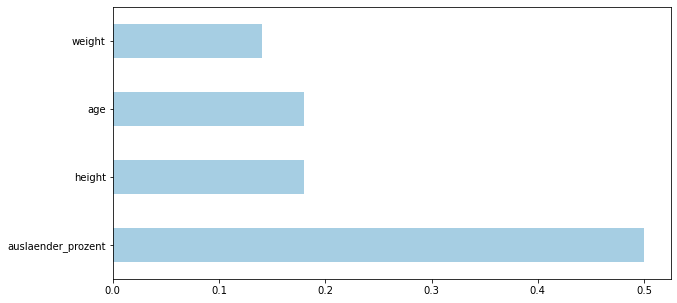

In [84]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
feat_importances = pd.Series(clf_C.feature_importances_, index=X.columns)
feat_importances.nlargest(4).plot(kind='barh',colormap='Paired')


### Modellbewertung

Das Modell mit den besten Ergbnissen war die logistische Regression

* Hyperparameters: 'C': 0.01 und 'penalty': 'l2'

* Final accuracy: 0.8000

* F-score: 0.5906

#### Auswertung der Ergebnisse
Nachdem wir das Modell auf der Grundlage verschiedener Metriken bewertet haben, können wir zu einer Schlussfolgerung kommen. 

Obwohl wir eine sehr hohe Accuracy von 80,0 % erhalten haben, haben wir später gesehen, dass das Modell nicht so gut war, wie wir zunächst dachten. In diesem speziellen Fall hatten wir es mit einem sehr unausgewogenen Datensatz zu tun. Für die erste Klasse haben wir fünf Mannschaften, zweit Klasse elf Mannschaften und die dritte Klasse vier Mannschfaten. Wir haben eine F-score von 0.5906. Mit einer F-Measure (beta=3.0): haben wir weniger Gewicht auf Präzision, mehr Gewicht auf recall und könnte so die Ergebnisse ein bisschen verbessert.







In [50]:
best_logistiche_regresion = pd.DataFrame(np.array([[1, 0.7778, 0.8000],[1, 0.5349, 0.5906]]),
                   columns=['Benchmark Predictor','Unoptimized Model','Optimized Model'], 
                   index=['Accuracy Score','F-score'])

best_logistiche_regresion

# Metric	Benchmark Predictor	Unoptimized Model	Optimized Model
# Accuracy Score	0.2478	0.8398	0.8680
# F-score	0.2917	0.6745	0.7498

,Benchmark Predictor,Unoptimized Model,Optimized Model
Accuracy Score,1.0,0.7778,0.8000
F-score,1.0,0.5349,0.5906


### Nächste Schritte 

- Es sind zu wenig Trainningsdate zu verfügen. Neue Daten sollten für den Algorithums gesammelt werden, um die Ergebnisse des Modelles zu verbessern.

-  Um aussagekräftige Modellperformance auf kleinen Datensätzen zu bekommen, könnte man das k-fache Kreuzvalidierungsverfahren implementieren. Die k-fold-Cross-Validatio ist eine Standardmethode zum Schätzen der Leistung eines maschinellen Lernalgorithmus oder einer Konfiguration für einen Datensatz. Das k-fache Kreuzvalidierungsverfahren unterteilt einen begrenzten Datensatz in k nicht überlappende Falten. Jede der k Faltungen erhält die Möglichkeit, als zurückgehaltener Testsatz verwendet zu werden. Während alle anderen Faltungen gemeinsam als Trainingsdatensatz verwendet werden. Insgesamt k Modelle werden an den k Hold-out-Testsätzen angepasst und bewertet, und die mittlere Leistung wird angegeben.


-  Das Modell-Tuning konnte neu versuchen werden. Statt mit Grid Search konnte man aus der Bibliotheke **scikit-optimize** die **Methoden Random Search** und **Bayesian Optimization** nehmen. Bei der Methode Random Search handelt sich um einen Raster mit Hyperparameterwerten. Die Werten werden zufällig aus verschidenen Kombinationen ausgewählt. Nach Abschluss des Trainings werden die besten Parameter gefundenen. Die Anzahl der Suchiterationen wird basierend auf Zeit/Ressourcen festgelegt.







### Modell Speichern

In [ ]:
import joblib as jb

modelo = LR
description='Logistische Regressionmodelo für die Klassifikation von Mannschaften aus der Premier Liga in Bezug auf den aktuel Kader , . \
 Columns: ' + " ','".join(X.columns)
date='07.02.2023'
version='0.3'
name_model='classificacao_times_RL'
metrics = 'acc: 0.8000 e f1socre: 0.5909'

dic_save_model = dict({
    'model': logreg_cv,
    'metadata': {
        'description': description,
        'author': 'Wildt',
        'date': date,
        'source_code_version': version,
        'metrics': metrics
    }
})
dic_save_model